<a href="https://colab.research.google.com/github/lc0/deeplearning-playground/blob/master/Dataset_CFPD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Download CFPD dataset
[CFPD | Colorful Fashion Parsing Data](https://github.com/hrsma2i/dataset-CFPD)

In [1]:
!pip install gdown

In [2]:
!gdown https://drive.google.com/uc?id=0BwIcx4kBjPrcTzlQYi1VbmthVVU&export=download

Downloading...
From: https://drive.google.com/uc?id=0BwIcx4kBjPrcTzlQYi1VbmthVVU
To: /content/tmm_dataset_sharing.zip
208MB [00:01, 185MB/s]


In [3]:
!unzip tmm_dataset_sharing.zip

Archive:  tmm_dataset_sharing.zip
replace fashon_parsing_data.mat? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: fashon_parsing_data.mat  
replace image/1.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: yA
  inflating: image/1.jpg             
replace image/100034.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: image/100034.jpg        
  inflating: image/100073.jpg        
  inflating: image/100088.jpg        
  inflating: image/100221.jpg        
  inflating: image/100232.jpg        
  inflating: image/100247.jpg        
  inflating: image/100254.jpg        
  inflating: image/10031.jpg         
  inflating: image/10032.jpg         
  inflating: image/10042.jpg         
  inflating: image/100599.jpg        
  inflating: image/10071.jpg         
  inflating: image/100824.jpg        
  inflating: image/10084.jpg         
  inflating: image/100922.jpg        
  inflating: image/100932.jpg        
  inflating: image/101074.jpg        
  inflating: image/10117.jpg         
  in

In [4]:
!ls -laF

total 330804
drwxr-xr-x 1 root root      4096 Nov 12 15:06 ./
drwxr-xr-x 1 root root      4096 Nov 12 15:00 ../
drwxr-xr-x 1 root root      4096 Nov  6 17:30 .config/
-rw-r--r-- 1 root root 131053028 Mar  5  2014 fashon_parsing_data.mat
drwxr-xr-x 2 root root     69632 Nov 12 15:07 image/
drwxr-xr-x 1 root root      4096 Nov  6 17:30 sample_data/
-rw-r--r-- 1 root root 207600631 Nov 12 15:06 tmm_dataset_sharing.zip


## h5py exploration

In [5]:
import h5py

filename = 'fashon_parsing_data.mat'

f = h5py.File(filename, 'r')

In [6]:
f.keys()

<KeysViewHDF5 ['#refs#', 'all_category_name', 'all_colors_name', 'fashion_dataset']>

In [7]:
h5py.File

h5py._hl.files.File

In [8]:
f.get('all_category_name')

<HDF5 dataset "all_category_name": shape (1, 23), type "|O">

In [9]:
from typing import List

def parse_categories(hd5_file: h5py.File) -> List[str]: 
    return _parse_list(hd5_file, 'all_category_name')

def parse_colors(hd5_file: h5py.File) -> List[str]: 
    return _parse_list(hd5_file, 'all_colors_name')

def _parse_list(hd5_file: h5py.File, name: str) -> List[str]: 
    result = []
    for ref in hd5_file.get(name)[0]:
        result.append(''.join([chr(c) for c in f[ref]]))

    return result


dataset_colors = parse_colors(f)
dataset_categories = parse_categories(f)

dataset_colors, dataset_categories

(['bk',
  'beige',
  'black',
  'blue',
  'brown',
  'gray',
  'green',
  'orange',
  'pink',
  'purple',
  'red',
  'white',
  'yellow'],
 ['bk',
  'T-shirt',
  'bag',
  'belt',
  'blazer',
  'blouse',
  'coat',
  'dress',
  'face',
  'hair',
  'hat',
  'jeans',
  'legging',
  'pants',
  'scarf',
  'shoe',
  'shorts',
  'skin',
  'skirt',
  'socks',
  'stocking',
  'sunglass',
  'sweater'])

In [10]:
len(f.get('#refs#'))

2719

In [11]:
f.get('#refs#').values()

ValuesViewHDF5(<HDF5 group "/#refs#" (2719 members)>)

In [12]:
c = 0
for ref in f.get('#refs#').values():
    print(ref)
    print(ref.keys())
    print(ref.get('category_label'))
    print(ref.get('color_label'))
    print(ref.get('img_name'))
    print(ref.get('segmentation'))
    
    category_label = ref.get('category_label')[0]

    c += 1
    if c >= 4:
        break

<HDF5 group "/#refs#/0" (4 members)>
<KeysViewHDF5 ['category_label', 'color_label', 'img_name', 'segmentation']>
<HDF5 dataset "category_label": shape (1, 425), type "<f8">
<HDF5 dataset "color_label": shape (1, 425), type "<f8">
<HDF5 dataset "img_name": shape (9, 1), type "<u2">
<HDF5 dataset "segmentation": shape (400, 600), type "<f4">
<HDF5 group "/#refs#/0A" (4 members)>
<KeysViewHDF5 ['category_label', 'color_label', 'img_name', 'segmentation']>
<HDF5 dataset "category_label": shape (1, 425), type "<f8">
<HDF5 dataset "color_label": shape (1, 425), type "<f8">
<HDF5 dataset "img_name": shape (10, 1), type "<u2">
<HDF5 dataset "segmentation": shape (400, 600), type "<f4">
<HDF5 group "/#refs#/0B" (4 members)>
<KeysViewHDF5 ['category_label', 'color_label', 'img_name', 'segmentation']>
<HDF5 dataset "category_label": shape (1, 425), type "<f8">
<HDF5 dataset "color_label": shape (1, 425), type "<f8">
<HDF5 dataset "img_name": shape (10, 1), type "<u2">
<HDF5 dataset "segmentation

In [13]:
category_label

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1., 23.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1., 23., 23., 23., 23.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., 23.,
       23.,  1.,  1.,  1., 18.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., 23

In [14]:
# ref.get('segmentation').value.T.shape
ref['segmentation'].value

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  


array([[  0.,   0.,   0., ...,  24.,  24.,  24.],
       [  0.,   0.,   0., ...,  24.,  24.,  24.],
       [  0.,   0.,   0., ...,  24.,  24.,  24.],
       ...,
       [400., 400., 400., ..., 424., 424., 424.],
       [400., 400., 400., ..., 424., 424., 424.],
       [400., 400., 400., ..., 424., 424., 424.]], dtype=float32)

In [15]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from pathlib import Path

In [16]:
filename = ''.join([chr(c) for c in ref['img_name']])
filename

'102919.jpg'

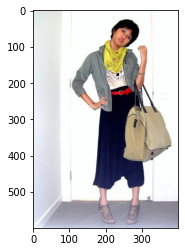

In [17]:
base = Path('image')

img = mpimg.imread(base / filename)
plt.imshow(img)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  """Entry point for launching an IPython kernel.


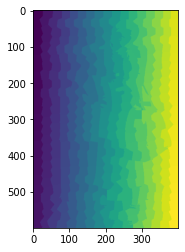

In [18]:
plt.imshow(ref['segmentation'].value.T)

In [19]:
import numpy as np

spix_segmentation = ref['segmentation'].value.T

sem_segmentation = np.zeros(spix_segmentation.shape)
for i, c in enumerate(category_label):
    # print(i, c)
    sem_segmentation[spix_segmentation == i] = c-1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  This is separate from the ipykernel package so we can avoid doing imports until


## Display utilities

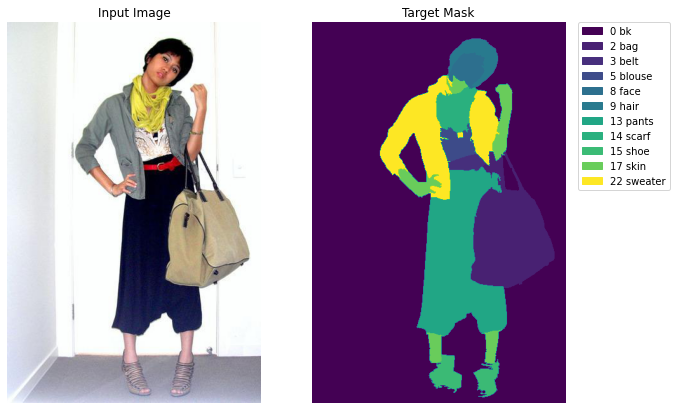

In [20]:
import tensorflow as tf 
import matplotlib.patches as mpatches

def display(image_list, target_category=None):
    if target_category:
        for target_category_id, category in enumerate(dataset_categories):
            if target_category == category:
                print(f"Found `{target_category}` class - {target_category_id}")
                break
        else:
            raise KeyError(f"Target category '{target_category}' has not been found. Currently, available categories are: {dataset_categories}")

    images_to_show = len(image_list)
    plt.figure(figsize=(images_to_show*5, images_to_show*5))

    title = ['Input Image', 'Target Mask', 'Predicted Mask']

    for idx, image in enumerate(image_list):
        plt.subplot(1, images_to_show, idx+1)
        plt.title(title[idx])
        if target_category and idx > 0:
            filtered_image = image.copy()
            filtered_image[image != target_category_id] = 0

            im = plt.imshow(filtered_image)
        else:
            im = plt.imshow(image)

        plt.axis('off')

    # show legend for colors - https://stackoverflow.com/questions/25482876/how-to-add-legend-to-imshow-in-matplotlib
    if idx == images_to_show - 1 and target_category is None:
        
        values = np.unique(image)
        # get the colors of the values, according to the colormap used by imshow
        colors = [im.cmap(im.norm(value)) for value in values]
        
        # create a patch (proxy artist) for every color 
        patches = [mpatches.Patch(color=colors[idx], label=f"{int(c)} {dataset_categories[int(c)]}") for idx, c in enumerate(values)]
        # put those patched as legend-handles into the legend
        plt.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0. )

    plt.show()

display([img, sem_segmentation])

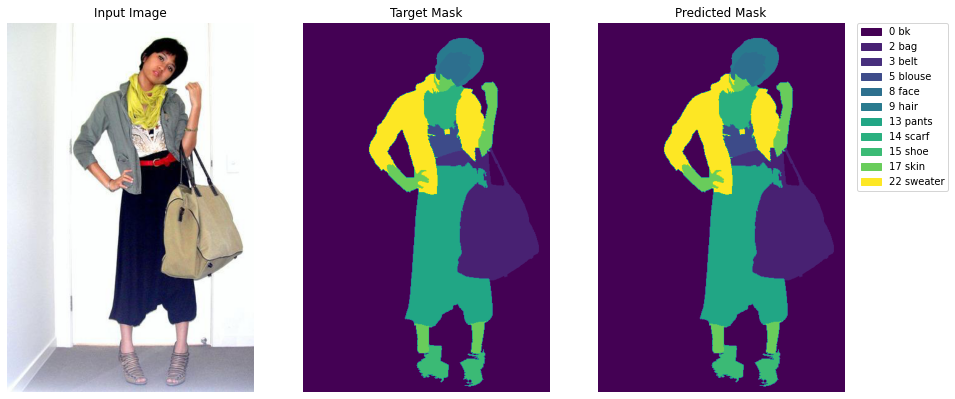

In [21]:
display([img, sem_segmentation, sem_segmentation])

Found `skin` class - 17


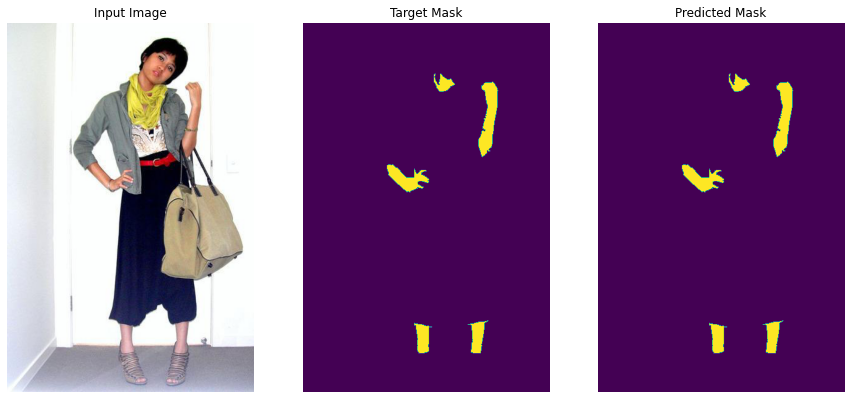

In [22]:
display([img, sem_segmentation, sem_segmentation], target_category='skin')

## Explore dataset

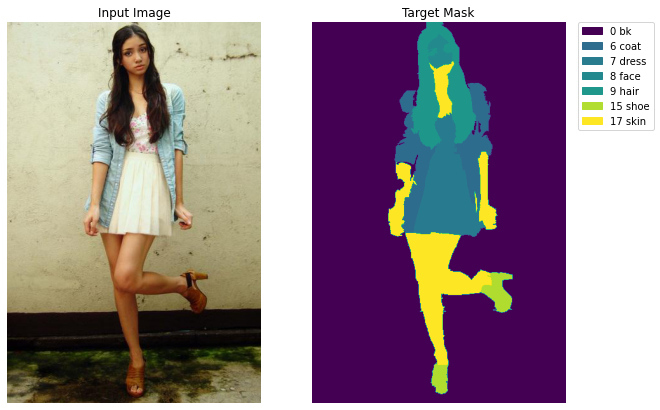

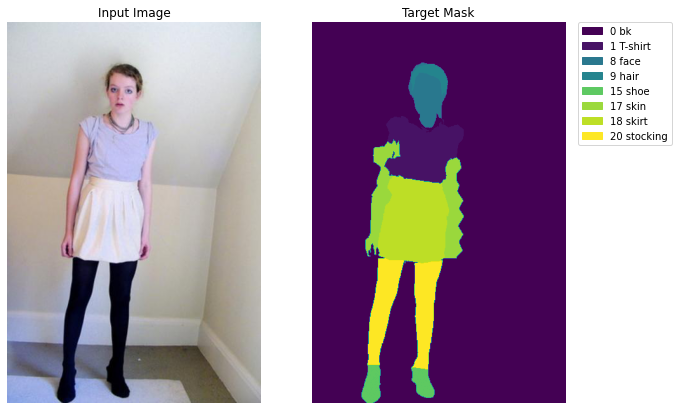

In [23]:
def _load_image(h5_example, path='image'):
    filename = ''.join([chr(c) for c in h5_example['img_name']])
    base = Path(path)

    img = mpimg.imread(base / filename)
    return img

def parse_example(example):
    category_label = example['category_label'][0]

    spix_segmentation = example['segmentation'][:].T
    semantic_segmentation = np.zeros(spix_segmentation.shape)
    for i, c in enumerate(category_label):
        semantic_segmentation[spix_segmentation == i] = c-1

    return _load_image(example), semantic_segmentation



MAX_IMAGES = 2

c = 0
for example in f.get('#refs#').values():
    raw_image, segmentation = parse_example(example)
    display([raw_image, segmentation])

    c += 1
    if c >= MAX_IMAGES:
        break